In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [15]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
#print(objp)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
#print(objp)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
out_dir='camera_cal/output/'

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        image_name=os.path.split(fname)[1]
        #print(image_name)
        write_name = out_dir+'corners_found_'+image_name
        cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)
    else:
        print('calibration', image_name + ': no corners found')

cv2.destroyAllWindows()

calibration calibration3.jpg: no corners found
calibration calibration7.jpg: no corners found
calibration calibration3.jpg: no corners found


### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

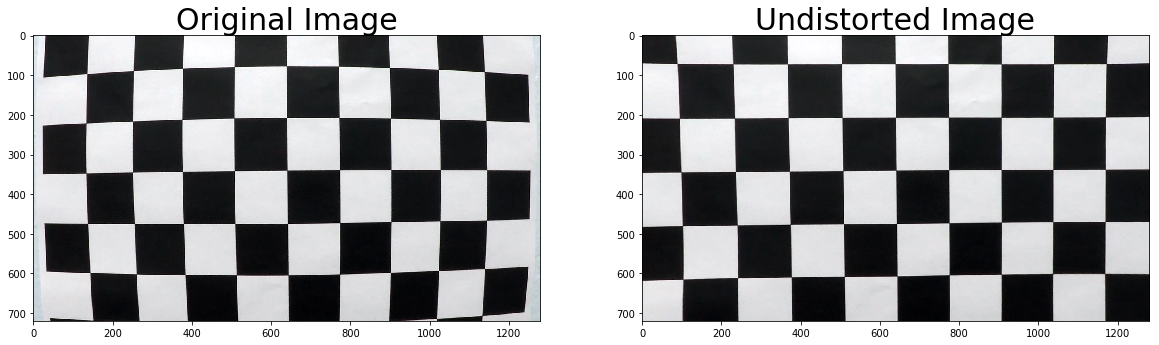

In [16]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1_test.jpg')
img_size = (img.shape[1], img.shape[0])  #shape is y,x => img_size is x,y

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('camera_cal/output/calibration1_test.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/output/cal_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [17]:
# Visualize undistortion
# Step through the list and search for chessboard corners
# load pickled distortion matrix

with open('camera_cal/output/cal_dist_pickle.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
# Visualize undistortion on test images

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    image_name=os.path.split(fname)[1]
    write_name = out_dir+'undistorted/'+image_name
    cv2.imwrite(write_name,dst)
    print(write_name)
    cv2.imshow('dst', dst)
    cv2.waitKey(500)
cv2.destroyAllWindows()

camera_cal/output/undistorted/calibration5.jpg
camera_cal/output/undistorted/calibration10.jpg
camera_cal/output/undistorted/calibration16.jpg
camera_cal/output/undistorted/calibration9.jpg
camera_cal/output/undistorted/calibration11.jpg
camera_cal/output/undistorted/calibration6.jpg
camera_cal/output/undistorted/calibration19.jpg
camera_cal/output/undistorted/calibration20.jpg
camera_cal/output/undistorted/calibration17.jpg
camera_cal/output/undistorted/calibration14.jpg
camera_cal/output/undistorted/calibration8.jpg
camera_cal/output/undistorted/calibration15.jpg
camera_cal/output/undistorted/calibration13.jpg
camera_cal/output/undistorted/calibration18.jpg
camera_cal/output/undistorted/calibration2.jpg
camera_cal/output/undistorted/calibration7.jpg
camera_cal/output/undistorted/calibration4.jpg
camera_cal/output/undistorted/calibration12.jpg
camera_cal/output/undistorted/calibration3.jpg
camera_cal/output/undistorted/calibration1.jpg
